# Training and Validating Bug Prediction Models Assignment 


Below are the required imports

In [81]:
# dataset operations (panda dataframes) 
import pandas as pd
# preprocessing (binarizer)
from sklearn import preprocessing
#data balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# accuracy metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from matplotlib import pyplot
from sklearn.metrics import roc_curve
# feature selection 
from sklearn.datasets import load_digits
from mlxtend.feature_selection import ExhaustiveFeatureSelector 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, chi2
# single classifiers
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# 1 Read in CSV data and preprocess

## 1.1 Reading in the csv file data with pandas into a dataframe


In [82]:
data = pd.read_csv("./datasets/lucene-2.4.csv" )

## 1.2 Binarize the bug column
Binarize the 'bug' column - '0' for **No-bug** and '1' for **bug**.

In [83]:
binarizer = preprocessing.Binarizer()
data['bug'] = binarizer.transform(data['bug'].values.reshape(-1,1))

Separate the features (x) from the target column (y). Also, remove non-numeric fields that do not help in prediction. Note: Some data balancers do not accept non-numeric fields.
The data description helps us see the counts of each column, the variance and the mean.

In [84]:
x = data.drop(['name','version','name.1','bug'], axis=1)
y = data['bug']
data = data.drop(['name','version','name.1'], axis=1)
print("preprocessed data overview:")
print(data.describe())

preprocessed data overview:
              wmc         dit         noc        cbo         rfc         lcom  \
count  340.000000  340.000000  340.000000  340.00000  340.000000   340.000000   
mean    10.394118    1.805882    0.670588   10.75000   25.191176    68.723529   
std     13.440922    0.891104    1.816920   12.16307   32.199259   442.984521   
min      1.000000    1.000000    0.000000    0.00000    1.000000     0.000000   
25%      4.000000    1.000000    0.000000    4.00000    8.000000     0.000000   
50%      7.000000    2.000000    0.000000    7.00000   18.000000     3.000000   
75%     13.000000    2.000000    0.000000   13.00000   31.000000    15.000000   
max    166.000000    5.000000   17.000000  128.00000  392.000000  6747.000000   

               ca          ce         npm       lcom3     ...             dam  \
count  340.000000  340.000000  340.000000  340.000000     ...      340.000000   
mean     5.979412    5.388235    6.747059    0.964345     ...        0.456135   

# 2 Data balancing

## SMOTE 
Use synthetic Minority Oversampling Technique (SMOTE) and indicate the categorical columns


In [85]:
X_balanced, y_balanced = SMOTE().fit_resample(x, y)
print('X_smotec.shape: {0}'.format(X_balanced.shape))

X_smotec.shape: (406, 20)


# 3 Feature selection
In this task we aim to select the features that most influence the classification outcome. We aim to remove covariant features to reduce overfitting and the training cost.

## Univariate feature selection
*Univariate feature selection works by selecting the best features based on univariate statistical tests. SelectPercentile (a type of Univariate feature selection) removes all but a user-specified highest scoring percentage of features.* 

In [86]:
X_best_feature = SelectPercentile(chi2, percentile=80).fit_transform(X_balanced, y_balanced)
print('     X_best_feature.shape: {0}'.format(X_best_feature.shape))

     X_best_feature.shape: (406, 16)


# 4 Classification 


## 4.1  single classifiers

In [87]:
d_tree = tree.DecisionTreeClassifier()
l_regression = LogisticRegression(solver='lbfgs',max_iter=5000)
n_bayes = GaussianNB()
single_classifier_list = [("d_tree",d_tree),("l_regression",l_regression), ("n_bayes",n_bayes)] 

## 4.2 Ensemble Classifiers 

**4.2.1 Majority voting classifier**

*Each instance is predicted using the m models that return a confidence score ranging between 0 and 1.The scores are combined by an operator (e.g.,Average)*

In [88]:
eclf = VotingClassifier(estimators=[("d_tree",d_tree),("l_regression",l_regression), ("n_bayes",n_bayes)]
                            , voting='hard')
majority_voting_clf=[('ensemble_voting',eclf)]



**4.2.2 Bagging Classifier**

*M datasets with the same size as the original one are generated by performing sampling with replacement (Bootstrap) from the training set. Each dataset a model is trained using a weak classifier. The instances are predicted using the m models and the outcomes are combined using majority voting.*

In [89]:
bagging = BaggingClassifier(base_estimator=d_tree, n_estimators=10)
bagging_clf=[('ensemble_bagging',bagging)]


**4.2.3 Random Forest**

*Random Forest is an ensemble of pruned decision trees. Similarly to Bagging, each decision tree is built through bootstrapping.The instances are predicted using the built decision trees. The predictions are combined using majority voting.*

In [90]:
randomForest = RandomForestClassifier(n_estimators=10)
randomForest_clf= [('ensemble_randomForest',randomForest)]

**Compare the accuracy metrics of the above classifiers**
Ensemble classifiers are expected to have better accuracy metrics than single classifiers

d_tree Number of mislabeled points out of a total 406 points : 127
d_treeconfusion_matrix:
  d_treeclassifier_accuracy_metrics:
     True Negative: 138
     False Positive: 65
     False Negative: 62
     True Positive: 141


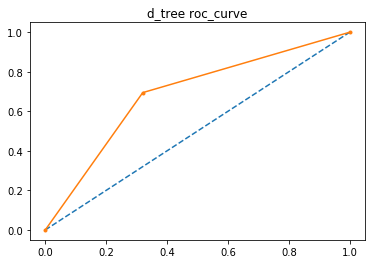

l_regression Number of mislabeled points out of a total 406 points : 121
l_regressionconfusion_matrix:
  l_regressionclassifier_accuracy_metrics:
     True Negative: 155
     False Positive: 48
     False Negative: 73
     True Positive: 130


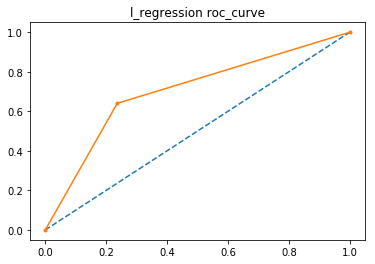

n_bayes Number of mislabeled points out of a total 406 points : 140
n_bayesconfusion_matrix:
  n_bayesclassifier_accuracy_metrics:
     True Negative: 187
     False Positive: 16
     False Negative: 124
     True Positive: 79


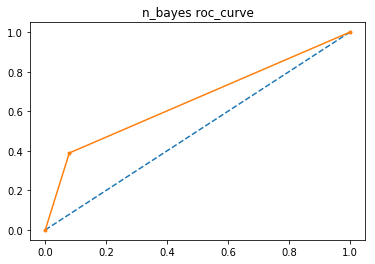

ensemble_voting Number of mislabeled points out of a total 406 points : 115
ensemble_votingconfusion_matrix:
  ensemble_votingclassifier_accuracy_metrics:
     True Negative: 171
     False Positive: 32
     False Negative: 83
     True Positive: 120


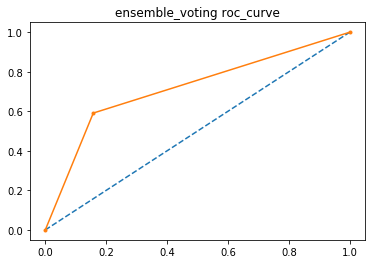

ensemble_bagging Number of mislabeled points out of a total 406 points : 104
ensemble_baggingconfusion_matrix:
  ensemble_baggingclassifier_accuracy_metrics:
     True Negative: 161
     False Positive: 42
     False Negative: 62
     True Positive: 141


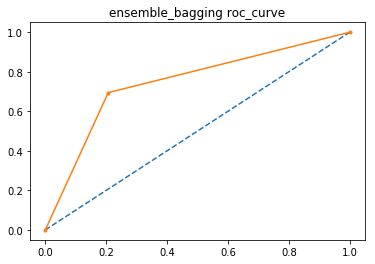

ensemble_randomForest Number of mislabeled points out of a total 406 points : 107
ensemble_randomForestconfusion_matrix:
  ensemble_randomForestclassifier_accuracy_metrics:
     True Negative: 167
     False Positive: 36
     False Negative: 71
     True Positive: 132


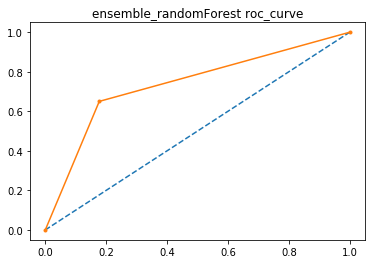

  Classifier MetricsAccuracy Metrics:
-------
{'d_tree': {'accuracy': 0.687192118226601, 'recall': 0.6844660194174758, 'f_score': 0.6894865525672372, 'precision': 0.6945812807881774, 'roc_auc_score': 0.6872330097087378, 'matthews_corrcoef': 0.3744251257024314}}
-------
{'l_regression': {'accuracy': 0.7019704433497537, 'recall': 0.7303370786516854, 'f_score': 0.6824146981627296, 'precision': 0.6403940886699507, 'roc_auc_score': 0.7050808200275971, 'matthews_corrcoef': 0.40703937963545905}}
-------
{'n_bayes': {'accuracy': 0.6551724137931034, 'recall': 0.8315789473684211, 'f_score': 0.5302013422818793, 'precision': 0.3891625615763547, 'roc_auc_score': 0.7164325605009307, 'matthews_corrcoef': 0.36652073794726175}}
-------
{'ensemble_voting': {'accuracy': 0.7167487684729064, 'recall': 0.7894736842105263, 'f_score': 0.6760563380281691, 'precision': 0.5911330049261084, 'roc_auc_score': 0.7313510153336096, 'matthews_corrcoef': 0.44786179858753916}}
-------
{'ensemble_bagging': {'accuracy': 0.

'ensemble_bagging'

In [91]:
y_best_feature = y_balanced
classifier_list = single_classifier_list + majority_voting_clf+bagging_clf + randomForest_clf
classifier_accuracy_metrics = classifier_helper(classifier_list,X_best_feature,y_best_feature)
get_best_accuracy_metrics(classifier_accuracy_metrics,"Classifier Metrics","matthews_corrcoef")

# 5 Helper Functions 

## 5.1 compute accuracy metrics


   **i. precision - It describes how good a model is at predicting the positive class**
   
    precision/Positive predictive value = TP/(TP+FP)
    
   **ii. recall-It describes how good the model is at predicting the positive class when the actual outcome is positive**
   
    recall/sensitivity/true positive rate = TP/(TP+FN)
    
   **iii. accuracy - Fraction predicted correctly**
   
    Accuracy(Fraction predicted correctly) = (TP+TN)/(TP+TN+FP+FN)
    
   **iv. f1-score - A measure of a test's accuracy that considers both the precision and the recall**
    
    f1_score = 2*precision*recall/(precision+recall)
    
   **V. Receiver Operating Characteristic area under curve (ROC AUC)** - The area under a roc curve (a curve of true positive rate against false positive rate (false positive rate = FP/TN + FP)}). Suitable for balanced data
   
   **vi.  Matthews correlation coefficient** - *a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1*. Suitable for both balanced and unbalanced data
    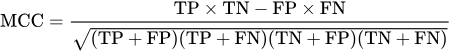


In [92]:
#compute_accuracy_metrics(y_pred,y_test, dataset_label)
#    parameters: 
#                - y_pred  - the predicted labels by the function "logistic_regression_evalution"
#                - y_test - the actual labels associated with the dataset
#                - dataset_label:- label (eg what data balancing or feature selection technique)
#     returns: 
# .              - a dictionary of accuracy metrics associated with the dataset_label
    
def compute_accuracy_metrics(y_pred,y_test, dataset_label):
    plot_roc_curve(y_pred,y_test, dataset_label)
    return {dataset_label: {"accuracy":accuracy_score(y_pred, y_test),
                    "recall":recall_score(y_pred,y_test),
                    "f_score":f1_score(y_pred, y_test),
                    "precision": precision_score(y_pred,y_test),
                    "roc_auc_score": roc_auc_score(y_pred,y_test),
                    "matthews_corrcoef": matthews_corrcoef(y_pred,y_test)}}
def plot_roc_curve(y_pred,y_test, dataset_label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.title(dataset_label+ ' roc_curve')
    pyplot.show()


In [93]:
# pretty prints a confusion matrix for better viewing
def pretty_print_confusion_matrix(matrix):
    print('     True Negative: {0}'.format(matrix[0][0]))
    print('     False Positive: {0}'.format(matrix[0][1]))
    print('     False Negative: {0}'.format(matrix[1][0]))
    print('     True Positive: {0}'.format(matrix[1][1]))

## 5.2 Getting the superior metrics given a list of dictionary metrics
**In the below function, we comapre different accuracy metircs provided as a list of dictionaries:**
**Get the best scoring data in terms of accuracy, recall, f_score, precision,roc_auc_score,
       or matthews_corrcoef**

In [94]:
#get_best_accuracy_metrics(dictionary_list,label,metric):
# parameters
#     - dictionary_list - a list of data or classifier label and accuracy metrics dictionary
#     - label - a label to identify what metrics were are comnparing eg classifiers, data balancers,
#      or feature selectors
#     - metric - the accuracy metric to compare performance by: accuracy, recall, f_score, precision,roc_auc_score,
#                 or matthews_corrcoef
# returns 
#      - the best dataSet or classifier label in terms of the f1_score metric
def get_best_accuracy_metrics(dictionary_list,label,metric):
    #print the accuracy metrics for each data
    print('  ' + label + "Accuracy Metrics:")
    for dictionary in dictionary_list:
        print("-------")
        print(dictionary)
    #determine the best dataset based on each dataset's the f_scores
    max_f1_score = 0.0
    best_data_set_or_model = ""
    for dictionary in dictionary_list:
        (data_set_type,sub_dict) = list(dictionary.items())[0]
        f_score = sub_dict[metric]
        if f_score > max_f1_score:
            max_f1_score = f_score
            best_data_set_or_model = data_set_type
    print ("----------")       
    print('  '+best_data_set_or_model + ' has the best ' + metric +' score: {0}'.format(max_f1_score))
    return best_data_set_or_model 

## 5.3 A classifier helper function to train and use K-fold validation for each classifier

In [95]:
#classifier_helper(classifier_list,X_best_feature,y_best_feature)
# parameters
#     - classifier_list - a list classifiers label, classifier object tuples
#     - X_best_feature - best features from the data-balancing and feature selection pipeline
#     - y_best_feature - best target column from the data-balancing and feature selection pipeline
# returns 
#      - a dictionary containing the classifier accuracy metrics
def classifier_helper(classifier_list,X_best_feature,y_best_feature):
    classifier_accuracy_metrics = []
    for classifier in classifier_list:
        (classifier_name,clf) = classifier
        y_pred = cross_val_predict(clf, X_best_feature, y_best_feature, cv=10)
        print(classifier_name + " Number of mislabeled points out of a total %d points : %d"% 
                  (y_best_feature.shape[0],(y_best_feature != y_pred).sum()))
        print(classifier_name + "confusion_matrix:")
        print('  '+ classifier_name + "classifier_accuracy_metrics:" )
        pretty_print_confusion_matrix(confusion_matrix(y_best_feature, y_pred))
        classifier_accuracy_metrics.append(compute_accuracy_metrics(y_pred,y_best_feature, classifier_name))
    return classifier_accuracy_metrics